<a href="https://colab.research.google.com/github/naaz-verma/DL_models/blob/main/Deep_learning_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deep Learning models

ANN

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [ ]:
data = pd.read_csv("Churn_Modelling.csv")

In [ ]:
X = data.iloc[:,3:-1].values
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [ ]:
Y = data.iloc[:,-1].values

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE1 = LabelEncoder()
X[:,2] = np.array(LE1.fit_transform(X[:,2]))

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct =ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder="passthrough")
X = np.array(ct.fit_transform(X))

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
ann = tf.keras.models.Sequential()

In [ ]:
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [ ]:
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
ann.fit(X_train,Y_train,batch_size=32,epochs = 100)

Epoch 1/100
250/250 [==============================] - 2s 3ms/step - loss: 0.5415 - accuracy: 0.7620
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4528 - accuracy: 0.7999
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4306 - accuracy: 0.8080
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4166 - accuracy: 0.8138
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4058 - accuracy: 0.8171
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3981 - accuracy: 0.8224
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3922 - accuracy: 0.8236
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3886 - accuracy: 0.8244
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3855 - accuracy: 0.8267
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3828 - accura

In [ ]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1,50000]])) > 0.5)

[[False]]


CNN using keras

In [ ]:
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)


Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [ ]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)


Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 9')

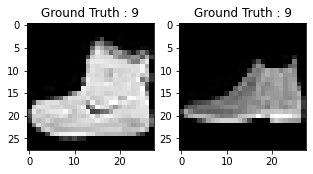

In [ ]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))


In [ ]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape


((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.


In [ ]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])


Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)


In [ ]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape


((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [ ]:
import keras
import tensorflow

# Sequential- stack of layers for model
# Input - to create a keras tensor
# Model - groups layers into and object with training and inference features.
from keras.models import Sequential,Input,Model

# Dense - implements the operation: output = activation(dot(input, kernel) + bias)
# Droput - randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting
# Flatten - Flattens the input. Does not affect the batch size. If inputs are shaped (batch,) without a feature axis, 
# then flattening adds an extra channel dimension and output shape is (batch, 1).
from keras.layers import Dense, Dropout, Flatten

# Conv2D - 2D convolution layer (e.g. spatial convolution over images). This layer creates a convolution kernel that is 
# convolved with the layer input to produce a tensor of outputs.
# MaxPooling2D - Downsamples the input along its spatial dimensions (height and width) 
# by taking the maximum value over an input window (of size defined by pool_size) for each channel of the input.
from keras.layers import Conv2D, MaxPooling2D

# Batch normalization applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.
from tensorflow.keras.layers import BatchNormalization

# Leaky version of a Rectified Linear Unit.
# It allows a small gradient when the unit is not active
from keras.layers.advanced_activations import LeakyReLU

In [ ]:
batch_size = 64
epochs = 20
num_classes = 10

In [ ]:
fashion_model = Sequential()

fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))

fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))

fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))  

fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())

fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
                  
fashion_model.add(Dense(num_classes, activation='softmax'))

In [ ]:
# Optimizers are used to adjust the parameters for a model. The purpose of an optimizer is to adjust model weights to maximize a loss function.
# Loss function is a method of evaluating how well your algorithm is modeling your dataset.
# metrics - List of metrics to be evaluated by the model during training and testing

fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
fashion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

In [ ]:
# x- input data, y - output data
# batch size - number of samples per gradient update
# epoch - An epoch is an iteration over the entire x and y data provided
# verbose - 0 = silent, 1 = progress bar, 2 = one line per epoch.
# validation data - Data on which to evaluate the loss and any model metrics at the end of each epoch.
# note the fact that the validation loss of data provided using validation_split or validation_data 
# is not affected by regularization layers like noise and dropout.
# The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting.


fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 101s 133ms/step - loss: 0.4649 - accuracy: 0.8299 - val_loss: 0.3244 - val_accuracy: 0.8840
Epoch 2/20
750/750 [==============================] - 88s 117ms/step - loss: 0.2897 - accuracy: 0.8942 - val_loss: 0.2960 - val_accuracy: 0.8934
Epoch 3/20
750/750 [==============================] - 88s 117ms/step - loss: 0.2420 - accuracy: 0.9120 - val_loss: 0.2546 - val_accuracy: 0.9084
Epoch 4/20
750/750 [==============================] - 87s 117ms/step - loss: 0.2109 - accuracy: 0.9225 - val_loss: 0.2331 - val_accuracy: 0.9160
Epoch 5/20
750/750 [==============================] - 88s 117ms/step - loss: 0.1859 - accuracy: 0.9308 - val_loss: 0.2186 - val_accuracy: 0.9208
Epoch 6/20
750/750 [==============================] - 88s 117ms/step - loss: 0.1624 - accuracy: 0.9403 - val_loss: 0.2352 - val_accuracy: 0.9173
Epoch 7/20
750/750 [==============================] - 88s 117ms/step - loss: 0.1414 - accuracy: 0.9473 - val_loss: 0.2334 - val_a

In [ ]:
# Returns the loss value & metrics values for the model in test mode. Computation is done in batches

test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)

In [ ]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.4428168833255768
Test accuracy: 0.9182000160217285


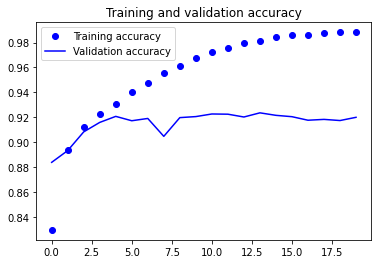

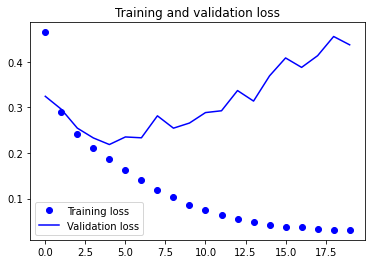

In [ ]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


CNN with dropout

In [ ]:
batch_size = 64
epochs = 10
num_classes = 10

In [ ]:
fashion_model = Sequential()

fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))

fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))

fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))

fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))

fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1)) 

fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))

fashion_model.add(Flatten())

fashion_model.add(Dense(128, activation='linear'))

fashion_model.add(LeakyReLU(alpha=0.1))           
fashion_model.add(Dropout(0.3))

fashion_model.add(Dense(num_classes, activation='softmax'))

In [ ]:
fashion_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                      

In [ ]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 95s 125ms/step - loss: 0.5992 - accuracy: 0.7781 - val_loss: 0.3695 - val_accuracy: 0.8636
Epoch 2/20
750/750 [==============================] - 94s 126ms/step - loss: 0.3770 - accuracy: 0.8611 - val_loss: 0.3175 - val_accuracy: 0.8838
Epoch 3/20
750/750 [==============================] - 95s 126ms/step - loss: 0.3279 - accuracy: 0.8793 - val_loss: 0.2793 - val_accuracy: 0.8993
Epoch 4/20
750/750 [==============================] - 94s 126ms/step - loss: 0.3011 - accuracy: 0.8894 - val_loss: 0.2644 - val_accuracy: 0.9022
Epoch 5/20
750/750 [==============================] - 94s 126ms/step - loss: 0.2817 - accuracy: 0.8951 - val_loss: 0.2447 - val_accuracy: 0.9114
Epoch 6/20
750/750 [==============================] - 94s 126ms/step - loss: 0.2695 - accuracy: 0.9010 - val_loss: 0.2388 - val_accuracy: 0.9136
Epoch 7/20
750/750 [==============================] - 94s 126ms/step - loss: 0.2590 - accuracy: 0.9041 - val_loss: 0.2466 - val_ac

In [ ]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)

313/313 [==============================] - 6s 19ms/step - loss: 0.2235 - accuracy: 0.9218


In [ ]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.22349660098552704
Test accuracy: 0.9218000173568726


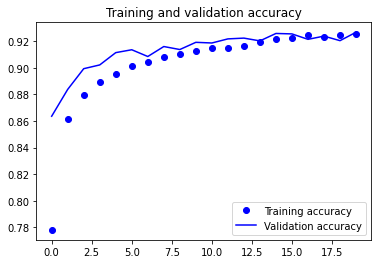

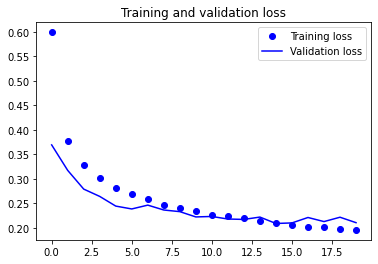

In [ ]:
accuracy = fashion_train_dropout.history['accuracy']
val_accuracy = fashion_train_dropout.history['val_accuracy']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


Predictions

In [ ]:
# Generates output predictions for the input samples. Computation is done in batches. 
predicted_classes = fashion_model.predict(test_X)

In [ ]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [ ]:
predicted_classes.shape, test_Y.shape

((10000,), (10000,))

Found 9190 correct labels


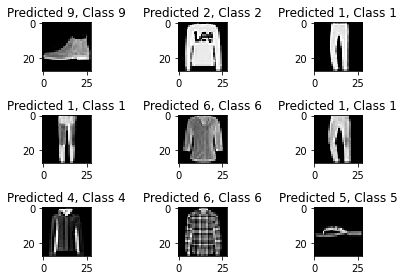

In [ ]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

In [ ]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.79      0.92      0.85      1000
     Class 1       1.00      0.98      0.99      1000
     Class 2       0.87      0.89      0.88      1000
     Class 3       0.91      0.94      0.93      1000
     Class 4       0.89      0.86      0.88      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.84      0.69      0.76      1000
     Class 7       0.95      0.98      0.97      1000
     Class 8       0.99      0.98      0.99      1000
     Class 9       0.97      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



RNN

In [ ]:
from pandas import read_csv
import numpy as np
from keras.models import Sequential

#SimpleRNN- fully-connected RNN where output is to be fed back to input
from keras.layers import Dense, SimpleRNN

#MinMaxScaler-Transform features by scaling each feature to a given range.
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

In [ ]:
#units-dimensionality of the output space.
#input_shape - shape of input
#activation - activation function for the network
#Linear activation
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, 
                        activation=activation[0],))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
    return model
 
demo_model = create_RNN(2, 1, (3,1), activation=['linear', 'linear'])

In [ ]:
wx = demo_model.get_weights()[0]
wh = demo_model.get_weights()[1]
bh = demo_model.get_weights()[2]
wy = demo_model.get_weights()[3]
by = demo_model.get_weights()[4]
 
print('wx = ', wx, ' wh = ', wh, ' bh = ', bh, ' wy =', wy, 'by = ', by)

wx =  [[ 0.87816703 -0.64084214]]  wh =  [[ 0.8315759  0.5554113]
 [ 0.5554113 -0.8315758]]  bh =  [0. 0.]  wy = [[ 1.1969091 ]
 [-0.91867244]] by =  [0.]


In [ ]:
x = np.array([1, 2, 3])
# Reshape the input to the required sample_size x time_steps x features 
x_input = np.reshape(x,(1, 3, 1))
y_pred_model = demo_model.predict(x_input)
 
 #hidden layers output
m = 2
h0 = np.zeros(m)
h1 = np.dot(x[0], wx) + h0 + bh
h2 = np.dot(x[1], wx) + np.dot(h1,wh) + bh
h3 = np.dot(x[2], wx) + np.dot(h2,wh) + bh
o3 = np.dot(h3, wy) + by
 
print('h1 = ', h1,'h2 = ', h2,'h3 = ', h3)
 
print("Prediction from network ", y_pred_model)
print("Prediction from our computation ", o3)

h1 =  [[ 0.87816703 -0.64084214]] h2 =  [[ 2.13066563 -0.26103158]] h3 =  [[ 4.26133134 -0.52206315]]
Prediction from network  [[5.580031]]
Prediction from our computation  [[5.58003116]]


In [ ]:
# Parameter split_percent defines the ratio of training examples
def get_train_test(url, split_percent=0.8):
    df = read_csv(url, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data
 
sunspots_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
train_data, test_data, data = get_train_test(sunspots_url)

In [ ]:
# Prepare the input X and target Y
def get_XY(dat, time_steps):
    # Indices of target array
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    # Prepare X
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))    
    return X, Y
 
time_steps = 12
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

In [ ]:
model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1), 
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2,)

Epoch 1/20
187/187 - 1s - loss: 0.1290 - accuracy: 0.0428 - 1s/epoch - 6ms/step
Epoch 2/20
187/187 - 0s - loss: 0.0415 - accuracy: 0.0428 - 390ms/epoch - 2ms/step
Epoch 3/20
187/187 - 0s - loss: 0.0226 - accuracy: 0.0428 - 399ms/epoch - 2ms/step
Epoch 4/20
187/187 - 0s - loss: 0.0184 - accuracy: 0.0428 - 400ms/epoch - 2ms/step
Epoch 5/20
187/187 - 0s - loss: 0.0154 - accuracy: 0.0428 - 396ms/epoch - 2ms/step
Epoch 6/20
187/187 - 0s - loss: 0.0136 - accuracy: 0.0428 - 397ms/epoch - 2ms/step
Epoch 7/20
187/187 - 0s - loss: 0.0121 - accuracy: 0.0428 - 396ms/epoch - 2ms/step
Epoch 8/20
187/187 - 0s - loss: 0.0110 - accuracy: 0.0428 - 437ms/epoch - 2ms/step
Epoch 9/20
187/187 - 0s - loss: 0.0100 - accuracy: 0.0428 - 452ms/epoch - 2ms/step
Epoch 10/20
187/187 - 0s - loss: 0.0093 - accuracy: 0.0428 - 404ms/epoch - 2ms/step
Epoch 11/20
187/187 - 0s - loss: 0.0087 - accuracy: 0.0428 - 386ms/epoch - 2ms/step
Epoch 12/20
187/187 - 0s - loss: 0.0081 - accuracy: 0.0428 - 390ms/epoch - 2ms/step
Epoc

In [ ]:
def print_error(trainY, testY, train_predict, test_predict):    
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))    
 
# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
# Mean square error
print_error(trainY, testY, train_predict, test_predict)

Train RMSE: 0.072 RMSE
Test RMSE: 0.117 RMSE


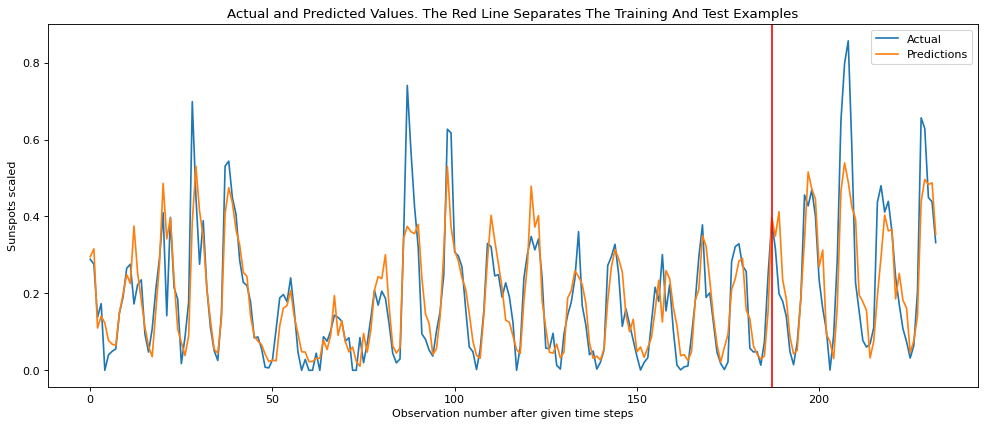

In [ ]:
# Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')
plot_result(trainY, testY, train_predict, test_predict)

LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
#LSTM - Long short term memory
# The requirements to use the cuDNN implementation are:
# 1. activation == tanh
# 2. recurrent_activation == sigmoid
# 3. recurrent_dropout == 0
# 4. unroll is False
# 5. use_bias is True
# 6. Inputs, if use masking, are strictly right-padded.
# 7. Eager execution is enabled in the outermost context.
mnist = tf.keras.datasets.mnist  # mnist is a dataset of 28x28 images of handwritten digits and their labels
(x_train, y_train),(x_test, y_test) = mnist.load_data()  # unpacks images to x_train/x_test and labels to y_train/y_test

x_train = x_train/255.0
x_test = x_test/255.0

print(x_train.shape)
print(x_train[0].shape)

model = Sequential()

# IF you are running with a GPU, try out the CuDNNLSTM layer type instead (don't pass an activation, tanh is required)
model.add(LSTM(128, input_shape=(x_train.shape[1:]), activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)

# Compile model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy'],
)

model.fit(x_train,
          y_train,
          epochs=3,
          validation_data=(x_test, y_test))

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(28, 28)


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/3
1875/1875 [==============================] - 180s 95ms/step - loss: 0.6054 - accuracy: 0.8046 - val_loss: 0.1990 - val_accuracy: 0.9441
Epoch 2/3
1875/1875 [==============================] - 162s 86ms/step - loss: 0.1581 - accuracy: 0.9574 - val_loss: 0.1124 - val_accuracy: 0.9689
Epoch 3/3
1875/1875 [==============================] - 161s 86ms/step - loss: 0.1130 - accuracy: 0.9701 - val_loss: 0.0654 - val_accuracy: 0.9826


In [ ]:
eval = model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 11s 36ms/step - loss: 0.0654 - accuracy: 0.9826


In [ ]:
print('Test loss:', eval[0])
print('Test accuracy:', eval[1])

Test loss: 0.06537845730781555
Test accuracy: 0.9825999736785889


GAN

In [ ]:
from numpy import zeros, ones, expand_dims, asarray
from numpy.random import randn, randint
from keras.datasets import fashion_mnist
from keras.optimizers import Adam
from keras.models import Model, load_model
from keras.layers import Input, Dense, Reshape, Flatten
from keras.layers import Conv2D, Conv2DTranspose, Concatenate
#Conv2DTranspose - The need for transposed convolutions generally arises from the desire to use a transformation going in the
# opposite direction of a normal convolution, i.e., from something that has the shape of the output of some convolution to 
#something that has the shape of its input while maintaining a connectivity pattern that is compatible with said convolution.

#Concatenate - Layer that concatenates a list of inputs.It takes as input a list of tensors, all of the same shape except for
# the concatenation axis, and returns a single tensor that is the concatenation of all inputs.
from keras.layers import LeakyReLU, Dropout, Embedding
from keras.layers import BatchNormalization, Activation
from keras import initializers
from keras.initializers import RandomNormal
# SGD - Gradient descent (with momentum) optimizer.
from keras.optimizers import Adam, RMSprop, SGD
from matplotlib import pyplot
import numpy as np
from math import sqrt

In [ ]:
# We are only loading the features of train data as we do not require the labels.
# Then we are dividing each pixel value by 127.5 and subtracting it from 1 to have pixel values in the range of -1 to 1.
(X_train, _), (_, _) = fashion_mnist.load_data()
X_train = X_train.astype(np.float32) / 127.5 - 1
X_train = np.expand_dims(X_train, axis=3)
print(X_train.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28, 1)


In [ ]:
def generate_latent_points(latent_dim, n_samples):
    x_input = randn(latent_dim * n_samples)  
    z_input = x_input.reshape(n_samples, latent_dim)
    return z_input

In [ ]:
def generate_real_samples(X_train, n_samples):
    ix = randint(0, X_train.shape[0], n_samples) 
    X = X_train[ix]  
    y = ones((n_samples, 1)) 
    return X, y

In [ ]:
def generate_fake_samples(generator, latent_dim, n_samples):
    z_input = generate_latent_points(latent_dim, n_samples)
    images = generator.predict(z_input)  
    y = zeros((n_samples, 1))
    return images, y

In [ ]:
def summarize_performance(step, g_model, latent_dim, n_samples=100):
    X, _ = generate_fake_samples(g_model, latent_dim, n_samples)
    X = (X + 1) / 2.0
    for i in range(100):
        pyplot.subplot(10, 10, 1 + i)
        pyplot.axis('off')
        pyplot.imshow(X[i, :, :, 0], cmap='gray_r')
    filename2 = 'model_%04d.h5' % (step+1)
    g_model.save(filename2)
    print('>Saved: %s' % (filename2))

In [ ]:
def save_plot(examples, n_examples):
    for i in range(n_examples):
        pyplot.subplot(sqrt(n_examples), sqrt(n_examples), 1 + i)
        pyplot.axis('off')
        pyplot.imshow(examples[i, :, :, 0], cmap='gray_r')
    pyplot.show()

In [ ]:
def define_discriminator(in_shape=(28, 28, 1)):
    init = RandomNormal(stddev=0.02)  
    in_image = Input(shape=in_shape)
    fe = Flatten()(in_image)
    fe = Dense(1024)(fe)
    fe = LeakyReLU(alpha=0.2)(fe)
    fe = Dropout(0.3)(fe)
    fe = Dense(512)(fe)
    fe = LeakyReLU(alpha=0.2)(fe)
    fe = Dropout(0.3)(fe)
    fe = Dense(256)(fe)
    fe = LeakyReLU(alpha=0.2)(fe)
    fe = Dropout(0.3)(fe)
    out = Dense(1, activation='sigmoid')(fe)
    model = Model(in_image, out)
    opt = Adam(lr=0.0002, beta_1=0.5) 
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [ ]:
discriminator = define_discriminator()

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
def define_generator(latent_dim): 
    init = RandomNormal(stddev=0.02)
    in_lat = Input(shape=(latent_dim,)) 
    gen = Dense(256, kernel_initializer=init)(in_lat)
    gen = LeakyReLU(alpha=0.2)(gen)
    gen = Dense(512, kernel_initializer=init)(gen)
    gen = LeakyReLU(alpha=0.2)(gen)
    gen = Dense(1024, kernel_initializer=init)(gen)
    gen = LeakyReLU(alpha=0.2)(gen)
    gen = Dense(28 * 28 * 1, kernel_initializer=init)(gen)
    out_layer = Activation('tanh')(gen)
    out_layer = Reshape((28, 28, 1))(gen)
    model = Model(in_lat, out_layer)
    return model

In [ ]:
generator = define_generator(100)

In [ ]:
def define_gan(g_model, d_model):
    d_model.trainable = False
    gan_output = d_model(g_model.output)
    model = Model(g_model.input, gan_output)
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [ ]:
gan_model = define_gan(generator, discriminator)

In [ ]:
def train(g_model, d_model, gan_model, X_train, latent_dim, n_epochs=100, n_batch=64):
    bat_per_epo = int(X_train.shape[0] / n_batch)
    n_steps = bat_per_epo * n_epochs
    for i in range(n_steps):
        X_real, y_real = generate_real_samples(X_train, n_batch)
        d_loss_r, d_acc_r = d_model.train_on_batch(X_real, y_real)
        X_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_batch)
        d_loss_f, d_acc_f = d_model.train_on_batch(X_fake, y_fake)
        z_input = generate_latent_points(latent_dim, n_batch) 
        y_gan = ones((n_batch, 1)) 
        g_loss, g_acc = gan_model.train_on_batch(z_input, y_gan)
        print('>%d, dr[%.3f,%.3f], df[%.3f,%.3f], g[%.3f,%.3f]' % (i+1, d_loss_r,d_acc_r, d_loss_f,d_acc_f, g_loss,g_acc))
        if (i+1) % (bat_per_epo * 1) == 0:
            summarize_performance(i, g_model, latent_dim)

2/2 [==============================] - 0s 7ms/step
>1, dr[0.606,0.625], df[0.802,0.719], g[0.961,0.250]
2/2 [==============================] - 0s 6ms/step
>2, dr[0.514,0.656], df[0.598,0.688], g[0.893,0.234]
2/2 [==============================] - 0s 9ms/step
>3, dr[0.608,0.594], df[0.709,0.594], g[0.978,0.188]
2/2 [==============================] - 0s 10ms/step
>4, dr[0.555,0.703], df[0.671,0.656], g[0.943,0.125]
2/2 [==============================] - 0s 9ms/step
>5, dr[0.648,0.531], df[0.499,0.859], g[1.031,0.156]
2/2 [==============================] - 0s 8ms/step
>6, dr[0.599,0.547], df[0.585,0.781], g[0.968,0.203]
2/2 [==============================] - 0s 21ms/step
>7, dr[0.541,0.641], df[0.562,0.719], g[0.924,0.234]
2/2 [==============================] - 0s 10ms/step
>8, dr[0.628,0.641], df[0.610,0.703], g[0.897,0.234]
2/2 [==============================] - 0s 8ms/step
>9, dr[0.640,0.547], df[0.650,0.719], g[0.908,0.250]
2/2 [==============================] - 0s 8ms/step
>10, dr[0.

>Saved: model_0937.h5
2/2 [==============================] - 0s 6ms/step
>938, dr[0.591,0.625], df[0.572,0.797], g[0.959,0.172]
2/2 [==============================] - 0s 8ms/step
>939, dr[0.580,0.656], df[0.588,0.812], g[1.047,0.156]
2/2 [==============================] - 0s 8ms/step
>940, dr[0.606,0.609], df[0.617,0.734], g[0.989,0.219]
2/2 [==============================] - 0s 6ms/step
>941, dr[0.573,0.625], df[0.520,0.828], g[0.893,0.328]
2/2 [==============================] - 0s 8ms/step
>942, dr[0.642,0.500], df[0.557,0.750], g[1.013,0.188]
2/2 [==============================] - 0s 8ms/step
>943, dr[0.661,0.562], df[0.721,0.641], g[0.915,0.281]
2/2 [==============================] - 0s 5ms/step
>944, dr[0.557,0.609], df[0.631,0.766], g[0.978,0.266]
2/2 [==============================] - 0s 8ms/step
>945, dr[0.601,0.562], df[0.536,0.859], g[0.966,0.172]
2/2 [==============================] - 0s 6ms/step
>946, dr[0.579,0.594], df[0.708,0.656], g[0.965,0.203]
2/2 [===================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


>Saved: model_1874.h5
2/2 [==============================] - 0s 8ms/step
>1875, dr[0.645,0.531], df[0.724,0.547], g[0.979,0.156]
2/2 [==============================] - 0s 7ms/step
>1876, dr[0.640,0.641], df[0.655,0.656], g[1.049,0.141]
2/2 [==============================] - 0s 7ms/step
>1877, dr[0.741,0.438], df[0.625,0.703], g[1.049,0.203]
2/2 [==============================] - 0s 10ms/step
>1878, dr[0.623,0.578], df[0.581,0.766], g[1.027,0.109]
2/2 [==============================] - 0s 7ms/step
>1879, dr[0.758,0.469], df[0.609,0.766], g[0.976,0.172]
2/2 [==============================] - 0s 9ms/step
>1880, dr[0.691,0.500], df[0.555,0.781], g[0.985,0.234]
2/2 [==============================] - 0s 13ms/step
>1881, dr[0.648,0.625], df[0.592,0.719], g[0.897,0.297]
2/2 [==============================] - 0s 9ms/step
>1882, dr[0.581,0.641], df[0.554,0.797], g[0.924,0.234]
2/2 [==============================] - 0s 9ms/step
>1883, dr[0.574,0.578], df[0.699,0.703], g[0.981,0.156]
2/2 [========

>Saved: model_2811.h5
2/2 [==============================] - 0s 7ms/step
>2812, dr[0.562,0.641], df[0.581,0.828], g[1.008,0.234]
2/2 [==============================] - 0s 6ms/step
>2813, dr[0.666,0.609], df[0.661,0.672], g[0.957,0.234]
2/2 [==============================] - 0s 9ms/step
>2814, dr[0.664,0.516], df[0.588,0.781], g[0.989,0.172]
2/2 [==============================] - 0s 7ms/step
>2815, dr[0.648,0.578], df[0.610,0.672], g[0.834,0.312]
2/2 [==============================] - 0s 7ms/step
>2816, dr[0.637,0.594], df[0.638,0.672], g[0.978,0.219]
2/2 [==============================] - 0s 7ms/step
>2817, dr[0.684,0.578], df[0.693,0.703], g[0.932,0.234]
2/2 [==============================] - 0s 8ms/step
>2818, dr[0.584,0.578], df[0.635,0.719], g[0.910,0.234]
2/2 [==============================] - 0s 6ms/step
>2819, dr[0.614,0.594], df[0.666,0.625], g[0.926,0.219]
2/2 [==============================] - 0s 6ms/step
>2820, dr[0.590,0.641], df[0.620,0.750], g[0.949,0.172]
2/2 [==========

>Saved: model_3748.h5
2/2 [==============================] - 0s 15ms/step
>3749, dr[0.596,0.625], df[0.726,0.594], g[0.925,0.250]
2/2 [==============================] - 0s 5ms/step
>3750, dr[0.606,0.578], df[0.642,0.672], g[1.008,0.156]
2/2 [==============================] - 0s 8ms/step
>3751, dr[0.571,0.672], df[0.570,0.719], g[1.134,0.172]
2/2 [==============================] - 0s 7ms/step
>3752, dr[0.685,0.516], df[0.595,0.703], g[1.119,0.125]
2/2 [==============================] - 0s 5ms/step
>3753, dr[0.623,0.516], df[0.586,0.750], g[1.003,0.203]
2/2 [==============================] - 0s 5ms/step
>3754, dr[0.552,0.594], df[0.564,0.781], g[1.086,0.094]
2/2 [==============================] - 0s 5ms/step
>3755, dr[0.682,0.516], df[0.563,0.719], g[1.056,0.141]
2/2 [==============================] - 0s 13ms/step
>3756, dr[0.657,0.531], df[0.562,0.750], g[0.963,0.234]
2/2 [==============================] - 0s 9ms/step
>3757, dr[0.664,0.578], df[0.561,0.828], g[0.936,0.297]
2/2 [========

>Saved: model_4685.h5
2/2 [==============================] - 0s 11ms/step
>4686, dr[0.556,0.625], df[0.623,0.734], g[0.978,0.281]
2/2 [==============================] - 0s 10ms/step
>4687, dr[0.654,0.547], df[0.749,0.625], g[0.983,0.203]
2/2 [==============================] - 0s 9ms/step
>4688, dr[0.618,0.578], df[0.524,0.812], g[1.000,0.156]
2/2 [==============================] - 0s 5ms/step
>4689, dr[0.606,0.547], df[0.654,0.641], g[1.125,0.109]
2/2 [==============================] - 0s 6ms/step
>4690, dr[0.608,0.594], df[0.572,0.766], g[1.017,0.172]
2/2 [==============================] - 0s 7ms/step
>4691, dr[0.698,0.500], df[0.607,0.641], g[0.989,0.172]
2/2 [==============================] - 0s 7ms/step
>4692, dr[0.653,0.562], df[0.585,0.797], g[1.018,0.203]
2/2 [==============================] - 0s 12ms/step
>4693, dr[0.664,0.562], df[0.680,0.656], g[0.968,0.203]
2/2 [==============================] - 0s 13ms/step
>4694, dr[0.666,0.594], df[0.650,0.734], g[1.044,0.109]
2/2 [======

>Saved: model_5622.h5
2/2 [==============================] - 0s 10ms/step
>5623, dr[0.612,0.594], df[0.572,0.719], g[0.924,0.281]
2/2 [==============================] - 0s 6ms/step
>5624, dr[0.545,0.703], df[0.567,0.766], g[0.945,0.172]
2/2 [==============================] - 0s 6ms/step
>5625, dr[0.580,0.688], df[0.726,0.594], g[0.918,0.281]
2/2 [==============================] - 0s 7ms/step
>5626, dr[0.668,0.531], df[0.653,0.641], g[1.044,0.109]
2/2 [==============================] - 0s 8ms/step
>5627, dr[0.642,0.578], df[0.587,0.781], g[0.992,0.203]
2/2 [==============================] - 0s 8ms/step
>5628, dr[0.635,0.562], df[0.507,0.828], g[0.942,0.219]
2/2 [==============================] - 0s 13ms/step
>5629, dr[0.598,0.578], df[0.666,0.625], g[1.015,0.172]
2/2 [==============================] - 0s 7ms/step
>5630, dr[0.594,0.672], df[0.687,0.625], g[1.027,0.156]
2/2 [==============================] - 0s 7ms/step
>5631, dr[0.613,0.609], df[0.594,0.734], g[0.968,0.297]
2/2 [========

>Saved: model_6559.h5
2/2 [==============================] - 0s 8ms/step
>6560, dr[0.659,0.484], df[0.537,0.797], g[0.962,0.219]
2/2 [==============================] - 0s 9ms/step
>6561, dr[0.647,0.531], df[0.618,0.688], g[0.975,0.156]
2/2 [==============================] - 0s 6ms/step
>6562, dr[0.601,0.625], df[0.546,0.766], g[0.937,0.281]
2/2 [==============================] - 0s 15ms/step
>6563, dr[0.543,0.688], df[0.612,0.703], g[0.965,0.219]
2/2 [==============================] - 0s 8ms/step
>6564, dr[0.559,0.578], df[0.769,0.578], g[0.957,0.219]
2/2 [==============================] - 0s 7ms/step
>6565, dr[0.549,0.719], df[0.634,0.672], g[0.968,0.234]
2/2 [==============================] - 0s 8ms/step
>6566, dr[0.655,0.609], df[0.679,0.703], g[1.075,0.109]
2/2 [==============================] - 0s 10ms/step
>6567, dr[0.699,0.516], df[0.607,0.781], g[0.943,0.234]
2/2 [==============================] - 0s 7ms/step
>6568, dr[0.642,0.578], df[0.642,0.766], g[1.054,0.141]
2/2 [========

>Saved: model_7496.h5
2/2 [==============================] - 0s 6ms/step
>7497, dr[0.534,0.750], df[0.540,0.750], g[1.003,0.188]
2/2 [==============================] - 0s 9ms/step
>7498, dr[0.585,0.609], df[0.706,0.594], g[1.050,0.094]
2/2 [==============================] - 0s 8ms/step
>7499, dr[0.555,0.656], df[0.581,0.734], g[1.047,0.203]
2/2 [==============================] - 0s 13ms/step
>7500, dr[0.619,0.609], df[0.617,0.703], g[1.119,0.109]
2/2 [==============================] - 0s 6ms/step
>7501, dr[0.670,0.484], df[0.540,0.797], g[1.134,0.141]
2/2 [==============================] - 0s 6ms/step
>7502, dr[0.681,0.547], df[0.573,0.766], g[1.083,0.125]
2/2 [==============================] - 0s 6ms/step
>7503, dr[0.677,0.500], df[0.574,0.656], g[0.967,0.219]
2/2 [==============================] - 0s 8ms/step
>7504, dr[0.645,0.562], df[0.599,0.797], g[0.939,0.281]
2/2 [==============================] - 0s 6ms/step
>7505, dr[0.590,0.578], df[0.648,0.672], g[1.063,0.172]
2/2 [=========

>Saved: model_8433.h5
2/2 [==============================] - 0s 8ms/step
>8434, dr[0.681,0.625], df[0.528,0.766], g[1.058,0.078]
2/2 [==============================] - 0s 15ms/step
>8435, dr[0.616,0.578], df[0.642,0.703], g[1.011,0.125]
2/2 [==============================] - 0s 14ms/step
>8436, dr[0.603,0.578], df[0.625,0.672], g[1.011,0.156]
2/2 [==============================] - 0s 7ms/step
>8437, dr[0.555,0.609], df[0.623,0.641], g[1.035,0.219]
2/2 [==============================] - 0s 7ms/step
>8438, dr[0.610,0.656], df[0.566,0.750], g[1.001,0.250]
2/2 [==============================] - 0s 7ms/step
>8439, dr[0.646,0.578], df[0.705,0.672], g[1.080,0.141]
2/2 [==============================] - 0s 6ms/step
>8440, dr[0.712,0.453], df[0.580,0.688], g[0.968,0.172]
2/2 [==============================] - 0s 12ms/step
>8441, dr[0.630,0.641], df[0.596,0.734], g[0.999,0.203]
2/2 [==============================] - 0s 17ms/step
>8442, dr[0.646,0.578], df[0.619,0.703], g[0.903,0.250]
2/2 [======

>Saved: model_9370.h5
2/2 [==============================] - 0s 6ms/step
>9371, dr[0.642,0.578], df[0.661,0.625], g[1.088,0.125]
2/2 [==============================] - 0s 14ms/step
>9372, dr[0.597,0.641], df[0.584,0.766], g[1.067,0.172]
2/2 [==============================] - 0s 7ms/step
>9373, dr[0.681,0.562], df[0.564,0.750], g[1.041,0.125]
2/2 [==============================] - 0s 9ms/step
>9374, dr[0.595,0.594], df[0.504,0.844], g[1.020,0.141]
2/2 [==============================] - 0s 13ms/step
>9375, dr[0.547,0.641], df[0.615,0.688], g[0.990,0.141]
2/2 [==============================] - 0s 8ms/step
>9376, dr[0.604,0.672], df[0.618,0.750], g[1.009,0.203]
2/2 [==============================] - 0s 6ms/step
>9377, dr[0.576,0.688], df[0.663,0.656], g[1.045,0.141]
2/2 [==============================] - 0s 25ms/step
>9378, dr[0.624,0.578], df[0.565,0.766], g[1.019,0.188]
2/2 [==============================] - 0s 7ms/step
>9379, dr[0.671,0.500], df[0.653,0.672], g[1.147,0.109]
2/2 [=======

>Saved: model_10307.h5
2/2 [==============================] - 0s 10ms/step
>10308, dr[0.565,0.672], df[0.636,0.641], g[0.972,0.203]
2/2 [==============================] - 0s 8ms/step
>10309, dr[0.578,0.672], df[0.725,0.531], g[1.055,0.109]
2/2 [==============================] - 0s 7ms/step
>10310, dr[0.685,0.469], df[0.539,0.781], g[1.015,0.219]
2/2 [==============================] - 0s 16ms/step
>10311, dr[0.696,0.531], df[0.706,0.672], g[1.019,0.141]
2/2 [==============================] - 0s 7ms/step
>10312, dr[0.623,0.641], df[0.571,0.672], g[0.972,0.156]
2/2 [==============================] - 0s 13ms/step
>10313, dr[0.656,0.547], df[0.607,0.750], g[1.004,0.172]
2/2 [==============================] - 0s 9ms/step
>10314, dr[0.688,0.531], df[0.636,0.719], g[1.052,0.125]
2/2 [==============================] - 0s 11ms/step
>10315, dr[0.673,0.562], df[0.687,0.688], g[0.885,0.250]
2/2 [==============================] - 0s 8ms/step
>10316, dr[0.691,0.516], df[0.636,0.719], g[0.918,0.234]
2

>Saved: model_11244.h5
2/2 [==============================] - 0s 7ms/step
>11245, dr[0.598,0.594], df[0.580,0.688], g[0.913,0.250]
2/2 [==============================] - 0s 8ms/step
>11246, dr[0.618,0.609], df[0.655,0.672], g[0.995,0.203]
2/2 [==============================] - 0s 21ms/step
>11247, dr[0.627,0.578], df[0.627,0.672], g[0.954,0.234]
2/2 [==============================] - 0s 8ms/step
>11248, dr[0.568,0.641], df[0.611,0.734], g[1.093,0.094]
2/2 [==============================] - 0s 8ms/step
>11249, dr[0.620,0.578], df[0.564,0.750], g[1.029,0.172]
2/2 [==============================] - 0s 7ms/step
>11250, dr[0.597,0.562], df[0.606,0.750], g[1.050,0.203]
2/2 [==============================] - 0s 7ms/step
>11251, dr[0.638,0.594], df[0.572,0.797], g[1.066,0.156]
2/2 [==============================] - 0s 12ms/step
>11252, dr[0.680,0.531], df[0.635,0.594], g[1.026,0.156]
2/2 [==============================] - 0s 12ms/step
>11253, dr[0.673,0.547], df[0.632,0.703], g[1.035,0.141]
2/

>Saved: model_12181.h5
2/2 [==============================] - 0s 8ms/step
>12182, dr[0.602,0.578], df[0.504,0.891], g[1.061,0.109]
2/2 [==============================] - 0s 7ms/step
>12183, dr[0.547,0.625], df[0.551,0.797], g[0.985,0.219]
2/2 [==============================] - 0s 7ms/step
>12184, dr[0.592,0.594], df[0.740,0.656], g[0.994,0.219]
2/2 [==============================] - 0s 7ms/step
>12185, dr[0.644,0.562], df[0.659,0.703], g[1.028,0.156]
2/2 [==============================] - 0s 8ms/step
>12186, dr[0.659,0.500], df[0.536,0.828], g[1.044,0.188]
2/2 [==============================] - 0s 5ms/step
>12187, dr[0.558,0.625], df[0.560,0.750], g[1.007,0.188]
2/2 [==============================] - 0s 8ms/step
>12188, dr[0.599,0.641], df[0.580,0.750], g[0.956,0.250]
2/2 [==============================] - 0s 15ms/step
>12189, dr[0.678,0.484], df[0.750,0.625], g[1.086,0.172]
2/2 [==============================] - 0s 12ms/step
>12190, dr[0.627,0.562], df[0.629,0.688], g[0.974,0.203]
2/2

>Saved: model_13118.h5
2/2 [==============================] - 0s 12ms/step
>13119, dr[0.620,0.625], df[0.658,0.609], g[0.950,0.219]
2/2 [==============================] - 0s 7ms/step
>13120, dr[0.612,0.625], df[0.679,0.656], g[0.926,0.250]
2/2 [==============================] - 0s 13ms/step
>13121, dr[0.578,0.609], df[0.579,0.734], g[1.020,0.234]
2/2 [==============================] - 0s 7ms/step
>13122, dr[0.619,0.562], df[0.602,0.750], g[1.009,0.266]
2/2 [==============================] - 0s 13ms/step
>13123, dr[0.641,0.547], df[0.674,0.641], g[0.958,0.219]
2/2 [==============================] - 0s 19ms/step
>13124, dr[0.648,0.578], df[0.530,0.797], g[0.987,0.219]
2/2 [==============================] - 0s 9ms/step
>13125, dr[0.566,0.625], df[0.637,0.719], g[0.950,0.188]
2/2 [==============================] - 0s 11ms/step
>13126, dr[0.530,0.688], df[0.636,0.688], g[0.883,0.297]
2/2 [==============================] - 0s 8ms/step
>13127, dr[0.607,0.609], df[0.662,0.672], g[0.957,0.250]


>Saved: model_14055.h5
2/2 [==============================] - 0s 10ms/step
>14056, dr[0.614,0.625], df[0.598,0.781], g[0.990,0.219]
2/2 [==============================] - 0s 6ms/step
>14057, dr[0.603,0.672], df[0.596,0.703], g[0.991,0.219]
2/2 [==============================] - 0s 9ms/step
>14058, dr[0.624,0.625], df[0.738,0.578], g[1.121,0.141]
2/2 [==============================] - 0s 6ms/step
>14059, dr[0.681,0.500], df[0.597,0.688], g[0.982,0.234]
2/2 [==============================] - 0s 6ms/step
>14060, dr[0.658,0.547], df[0.561,0.797], g[1.059,0.203]
2/2 [==============================] - 0s 8ms/step
>14061, dr[0.658,0.516], df[0.609,0.734], g[1.028,0.234]
2/2 [==============================] - 0s 6ms/step
>14062, dr[0.564,0.625], df[0.617,0.672], g[1.062,0.141]
2/2 [==============================] - 0s 6ms/step
>14063, dr[0.610,0.578], df[0.645,0.656], g[1.146,0.125]
2/2 [==============================] - 0s 8ms/step
>14064, dr[0.606,0.578], df[0.583,0.734], g[1.032,0.188]
2/2 

>Saved: model_14992.h5
2/2 [==============================] - 0s 7ms/step
>14993, dr[0.603,0.516], df[0.545,0.828], g[0.995,0.203]
2/2 [==============================] - 0s 15ms/step
>14994, dr[0.644,0.531], df[0.627,0.703], g[0.950,0.281]
2/2 [==============================] - 0s 6ms/step
>14995, dr[0.548,0.672], df[0.563,0.734], g[0.960,0.203]
2/2 [==============================] - 0s 6ms/step
>14996, dr[0.625,0.609], df[0.558,0.750], g[1.039,0.203]
2/2 [==============================] - 0s 7ms/step
>14997, dr[0.575,0.609], df[0.552,0.828], g[0.956,0.156]
2/2 [==============================] - 0s 9ms/step
>14998, dr[0.625,0.594], df[0.581,0.734], g[0.903,0.328]
2/2 [==============================] - 0s 10ms/step
>14999, dr[0.581,0.656], df[0.628,0.688], g[1.011,0.234]
2/2 [==============================] - 0s 8ms/step
>15000, dr[0.610,0.625], df[0.640,0.766], g[0.970,0.188]
2/2 [==============================] - 0s 11ms/step
>15001, dr[0.623,0.578], df[0.575,0.750], g[0.977,0.219]
2/

>Saved: model_15929.h5
2/2 [==============================] - 0s 7ms/step
>15930, dr[0.602,0.641], df[0.575,0.812], g[0.865,0.328]
2/2 [==============================] - 0s 10ms/step
>15931, dr[0.538,0.656], df[0.711,0.672], g[0.936,0.281]
2/2 [==============================] - 0s 5ms/step
>15932, dr[0.707,0.547], df[0.622,0.672], g[1.016,0.234]
2/2 [==============================] - 0s 5ms/step
>15933, dr[0.583,0.625], df[0.549,0.797], g[1.020,0.125]
2/2 [==============================] - 0s 12ms/step
>15934, dr[0.642,0.547], df[0.620,0.688], g[1.004,0.266]
2/2 [==============================] - 0s 8ms/step
>15935, dr[0.554,0.641], df[0.680,0.688], g[0.951,0.203]
2/2 [==============================] - 0s 7ms/step
>15936, dr[0.539,0.641], df[0.597,0.750], g[0.962,0.188]
2/2 [==============================] - 0s 8ms/step
>15937, dr[0.543,0.672], df[0.645,0.688], g[1.098,0.156]
2/2 [==============================] - 0s 15ms/step
>15938, dr[0.613,0.594], df[0.537,0.844], g[1.016,0.109]
2/

>Saved: model_16866.h5
2/2 [==============================] - 0s 14ms/step
>16867, dr[0.715,0.484], df[0.638,0.672], g[1.070,0.141]
2/2 [==============================] - 0s 7ms/step
>16868, dr[0.691,0.547], df[0.569,0.750], g[1.021,0.188]
2/2 [==============================] - 0s 15ms/step
>16869, dr[0.580,0.594], df[0.636,0.719], g[1.052,0.094]
2/2 [==============================] - 0s 9ms/step
>16870, dr[0.538,0.688], df[0.611,0.672], g[1.091,0.156]
2/2 [==============================] - 0s 15ms/step
>16871, dr[0.571,0.625], df[0.612,0.734], g[1.111,0.188]
2/2 [==============================] - 0s 6ms/step
>16872, dr[0.681,0.562], df[0.592,0.734], g[1.013,0.156]
2/2 [==============================] - 0s 8ms/step
>16873, dr[0.578,0.719], df[0.620,0.719], g[1.033,0.203]
2/2 [==============================] - 0s 7ms/step
>16874, dr[0.558,0.672], df[0.653,0.703], g[1.026,0.234]
2/2 [==============================] - 0s 7ms/step
>16875, dr[0.459,0.734], df[0.590,0.781], g[1.125,0.203]
2/

>Saved: model_17803.h5
2/2 [==============================] - 0s 11ms/step
>17804, dr[0.606,0.594], df[0.618,0.734], g[0.913,0.281]
2/2 [==============================] - 0s 9ms/step
>17805, dr[0.679,0.484], df[0.613,0.672], g[0.978,0.266]
2/2 [==============================] - 0s 8ms/step
>17806, dr[0.621,0.609], df[0.618,0.641], g[1.023,0.156]
2/2 [==============================] - 0s 7ms/step
>17807, dr[0.669,0.578], df[0.601,0.734], g[1.101,0.125]
2/2 [==============================] - 0s 7ms/step
>17808, dr[0.550,0.750], df[0.546,0.750], g[1.022,0.219]
2/2 [==============================] - 0s 7ms/step
>17809, dr[0.612,0.625], df[0.639,0.719], g[0.962,0.266]
2/2 [==============================] - 0s 7ms/step
>17810, dr[0.578,0.594], df[0.542,0.812], g[0.969,0.312]
2/2 [==============================] - 0s 7ms/step
>17811, dr[0.550,0.688], df[0.615,0.766], g[0.985,0.172]
2/2 [==============================] - 0s 8ms/step
>17812, dr[0.602,0.562], df[0.563,0.766], g[1.012,0.172]
2/2 

>Saved: model_18740.h5


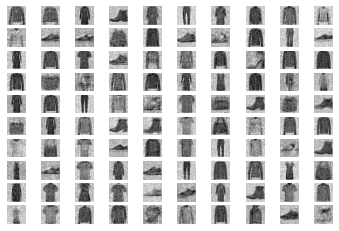

In [ ]:
latent_dim = 100
train(generator, discriminator, gan_model, X_train, latent_dim, n_epochs=20, n_batch=64)

4/4 [==============================] - 0s 4ms/step


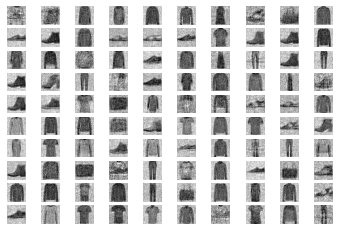

In [ ]:
model = load_model('model_18740.h5')
latent_dim = 100
n_examples = 100
latent_points = generate_latent_points(latent_dim, n_examples)
X  = model.predict(latent_points)
X = (X + 1) / 2.0
save_plot(X, n_examples)

VGG-19

In [ ]:
import numpy as np

# Image manipulation | OpenCV
import cv2

# Showing images and evaluating model results
import matplotlib.pyplot as plt

# VGG19 Model 
from keras.applications.vgg19 import VGG19

# Preparing VGG19 Model
from keras.layers import Dense,Flatten,Input
from keras.models import Sequential

# One hot label encoding
from keras.utils import to_categorical

# CIFAR10 dataset
from keras.datasets import cifar10

In [ ]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
print("Shape of x_train is ",x_train.shape)
print("Shape of y_train is ",y_train.shape)
print("Shape of x_test  is ",x_test.shape)
print("Shape of y_test  is",y_test.shape)

170498071/170498071 [==============================] - 6s 0us/step
Shape of x_train is  (50000, 32, 32, 3)
Shape of y_train is  (50000, 1)
Shape of x_test  is  (10000, 32, 32, 3)
Shape of y_test  is (10000, 1)


In [ ]:
def resize_img(img):
    numberOfImage = img.shape[0]
    new_array = np.zeros((numberOfImage, 48,48,3))
    for i in range(numberOfImage):
        new_array[i] = cv2.resize(img[i,:,:,:],(48,48))
    return new_array

In [ ]:
x_train = resize_img(x_train)
x_test = resize_img(x_test)
print("New shape of x_train is ",x_train.shape)
print("New shape of x_test  is ",x_test.shape)

New shape of x_train is  (50000, 48, 48, 3)
New shape of x_test  is  (10000, 48, 48, 3)


In [ ]:
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)

print("New shape of y_train is ",y_train.shape)
print("New shape of y_test  is ",y_test.shape)

New shape of y_train is  (50000, 10)
New shape of y_test  is  (10000, 10)


In [ ]:
# Include top = add fully connected layers to layer.
# Weights = use pretrained weights (trained in imagenet)
vgg = VGG19(include_top=False,weights="imagenet",input_shape=(48,48,3))

vgg.summary()

80134624/80134624 [==============================] - 3s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                              

In [ ]:
model = Sequential()

# Adding layers to the blank model
for layer in vgg.layers:
    model.add(layer)
    
# Don't train layers again, because they are already trained
for layer in model.layers:
    layer.trainable = False
    
# Adding fully connected layers
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(10,activation="softmax"))

# Checking model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 12, 12, 256)       2

In [ ]:
# However before this, we need to compile the model
model.compile(optimizer="RMSprop",loss="categorical_crossentropy",metrics=["accuracy"])

# Let's train.
hist = model.fit(x_train,y_train,validation_split=0.15,epochs=3,batch_size=1000)

# We use %15 of the train set as validation set.

Epoch 1/3
43/43 [==============================] - 1295s 30s/step - loss: 9.5294 - accuracy: 0.3990 - val_loss: 6.2294 - val_accuracy: 0.4455
Epoch 2/3
43/43 [==============================] - 1263s 29s/step - loss: 4.6640 - accuracy: 0.4966 - val_loss: 4.8197 - val_accuracy: 0.4804
Epoch 3/3
43/43 [==============================] - 1246s 29s/step - loss: 3.8420 - accuracy: 0.5128 - val_loss: 3.5493 - val_accuracy: 0.5071


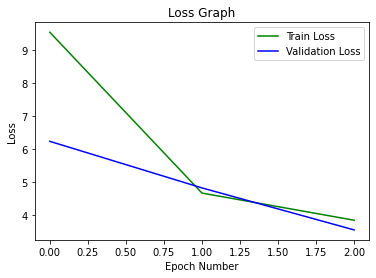

In [ ]:
plt.subplots(figsize=(6,4))
plt.plot(hist.epoch,hist.history["loss"],color="green",label="Train Loss")
plt.plot(hist.epoch,hist.history["val_loss"],color="blue",label="Validation Loss")
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Graph")
plt.show()

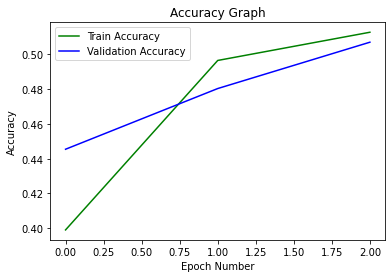

In [ ]:
plt.subplots(figsize=(6,4))
plt.plot(hist.epoch,hist.history["accuracy"],color="green",label="Train Accuracy")
plt.plot(hist.epoch,hist.history["val_accuracy"],color="blue",label="Validation Accuracy")
plt.xlabel("Epoch Number")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Graph")
plt.show()

In [ ]:
model.evaluate(x_test,y_test)


313/313 [==============================] - 258s 823ms/step - loss: 3.5736 - accuracy: 0.4978


[3.5735878944396973, 0.49779999256134033]

RBF

In [ ]:
# Radial basis function networks are distinguished from other neural networks due 
# to their universal approximation and faster learning speed.
from sklearn.datasets import load_iris
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
X, y = load_iris(return_X_y=True)
kernel = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel,random_state=0).fit(X, y)
gpc.score(X, y)

0.9866666666666667

In [ ]:
gpc.predict_proba(X[:2,:])

array([[0.83548752, 0.03228706, 0.13222543],
       [0.79064206, 0.06525643, 0.14410151]])